# Prediction of Doctor's Consultation Fee

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading train and test dataset
train=pd.read_excel('C:/Users/Hp/Desktop/Final Participant Data Folder/Final_Train.xlsx')
test=pd.read_excel('C:/Users/Hp/Desktop/Final Participant Data Folder/Final_Test.xlsx')

In [3]:
#checking the shape of a dataset
train.shape, test.shape

((5961, 7), (1987, 6))

In [4]:
train.head()


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


Training set is having 5961 rows and 7 columns i.e. attributes

In [6]:
#checking data type
train.dtypes, test.dtypes

(Qualification         object
 Experience            object
 Rating                object
 Place                 object
 Profile               object
 Miscellaneous_Info    object
 Fees                   int64
 dtype: object,
 Qualification         object
 Experience            object
 Rating                object
 Place                 object
 Profile               object
 Miscellaneous_Info    object
 dtype: object)

all are object data type.
only Fees(Target) is integer type.

In [7]:
train.info() ,test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile    

(None, None)

From above we can observe there are missing values present

In [8]:
#checking unique items
train.nunique()

Qualification         1420
Experience              64
Rating                  51
Place                  877
Profile                  6
Miscellaneous_Info    2998
Fees                    40
dtype: int64

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64


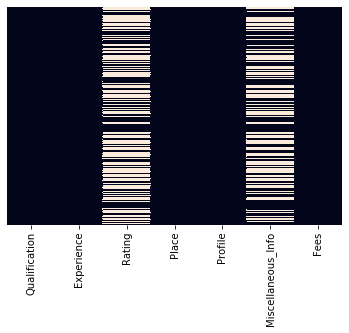

In [9]:
#checking null values
print(train.isnull().sum())
#check it via visualization
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

Rating and Miscellaneous_Info is having half of the missing values from the total,
In place Column 25 missing values are there

# Summary Statistics

In [10]:
train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Observations:
    1)min fees is 5 and maximum is 950
    2) As mean is greater than median thats why fees column is rightly skewed

In [11]:
# printing the object data type columns and their unique values
for column in train.columns:
    if train[column].dtypes==object:
        print(str(column)+ ':' +str(train[column].unique()))
        print(train[column].value_counts())
        print('**********************************************************************')
        print('\n')

Qualification:['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                                            488
BHMS                                                                           477
BAMS                                                                           471
MBBS                                                                           334
MBBS, MS - ENT                                                                 220
                                                                              ... 
MDS - Periodontology and Oral Implantology, BDS, Ph.D(Doctor of Philosophy)      1
MBBS, DNB - General Medicine, Diploma in Diabetology (Mumbai Un

Observations:
1)In Qualification BDS is having highest count followed by BHMS
2)More people are of 9 years of Experience
3)Most of the doctors rating is 100%
4)100 doctors from the place HSR Layout, Bangalore
5)Most doctors having profile as Dentist followed by General Medicine
6)Miscellaneous_Info contains Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth for most of the time

# Data Processing


In [12]:
#Now Lets look into each categorical column
#checking relevant qualification
train["Qualification"]=train["Qualification"].str.split(",")
Qualification ={}
for x in train["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

Most of the Qualification has occurence of 1 in entire dataset and some of the same qualification are encounted seperately.
Now lets consider top 10 qualification that occurs the most


In [13]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
for title in final_qua:
    train[title]=0
    
for x,y in zip(train["Qualification"].values,np.array([idx for idx in range(len(train))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            train[q][y] = 1


In [14]:
#Dropping qualification column
train.drop("Qualification",axis=1,inplace=True)

In [15]:
#looking into years of experience 
train["Experience"] =train["Experience"].str.split()  #splits the string into a list
train["Experience"] =train["Experience"].str[0].astype("int")  # strip first element of the list and convert it into an integer

In [16]:
#Looking into 'Place' column : having place and city
#separating place and city
train["Place"].fillna("Missing,Missing",inplace=True)  #replacing NaN values with Missing
train["Place"] =train["Place"].str.split(",")           
#splits the string into city and place
train["City"] =train["Place"].str[-1]
train["Place"] =train["Place"].str[0]

In [17]:
#Looking into Rating column,most of the data is missing and here we will make 11 bins by considering missing values as -99%
train["Rating"].fillna("-99%",inplace=True)
train["Rating"] =train["Rating"].str[:-1].astype("int")
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
train["Rating"] = pd.cut(train["Rating"],bins=bins,labels=labels,include_lowest=True)


In [18]:
train['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [19]:
#Looking into profile column,there are no missing values and data is also clean
train['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

here we can use one hot encoding to separate profile categories

In [20]:
#now looking into city and place
train['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Missing                  25
e                         1
Name: City, dtype: int64

This e value is something wrong so we count it in missing entry and is located at 3980


In [22]:
#replacing that e with missing
train["City"][3980] = "Missing"
train["Place"][3980] = "Missing"

In [23]:
#code to generate dummy variables for profile and city
train = pd.get_dummies(train,columns=["City","Profile"],prefix=["City","Profile"])

In [24]:
train.head()


,Experience,Rating,Place,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Missing,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,Kakkanad,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,Whitefield,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,Mathikere - BEL,NaN,300,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,Bannerghatta Road,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,Keelkattalai,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Data Visualization

## Univariate Analysis

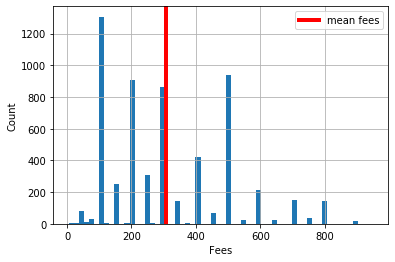

307.9446401610468


In [25]:
#checking mean fees
fees=train['Fees'].hist(bins=60)
mean_val=np.mean(train['Fees'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean fees')
plt.xlabel('Fees')
plt.ylabel('Count')
plt.legend()
plt.show()
print(train['Fees'].mean())

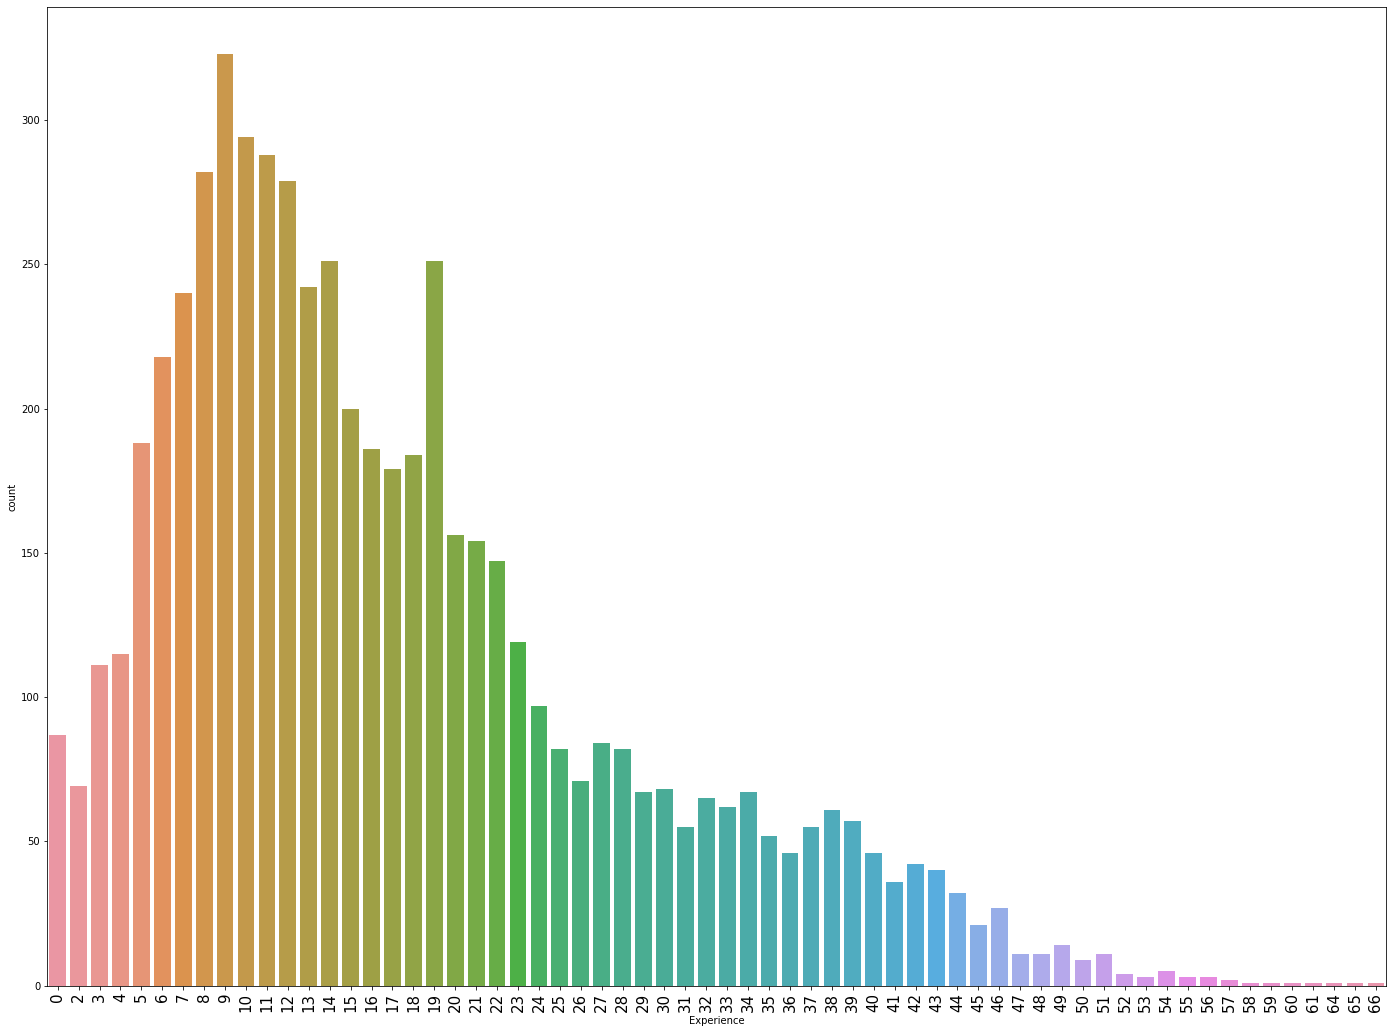

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
65      1
58      1
66      1
61      1
Name: Experience, Length: 64, dtype: int64


In [26]:
# count plot for Experience column
plt.figure(figsize=(24,18))
sns.countplot(x='Experience',data=train)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()
print(train['Experience'].value_counts())

 9 years Experience doctors are more in count i.e. 323 followed by 10 years with 294 doctors

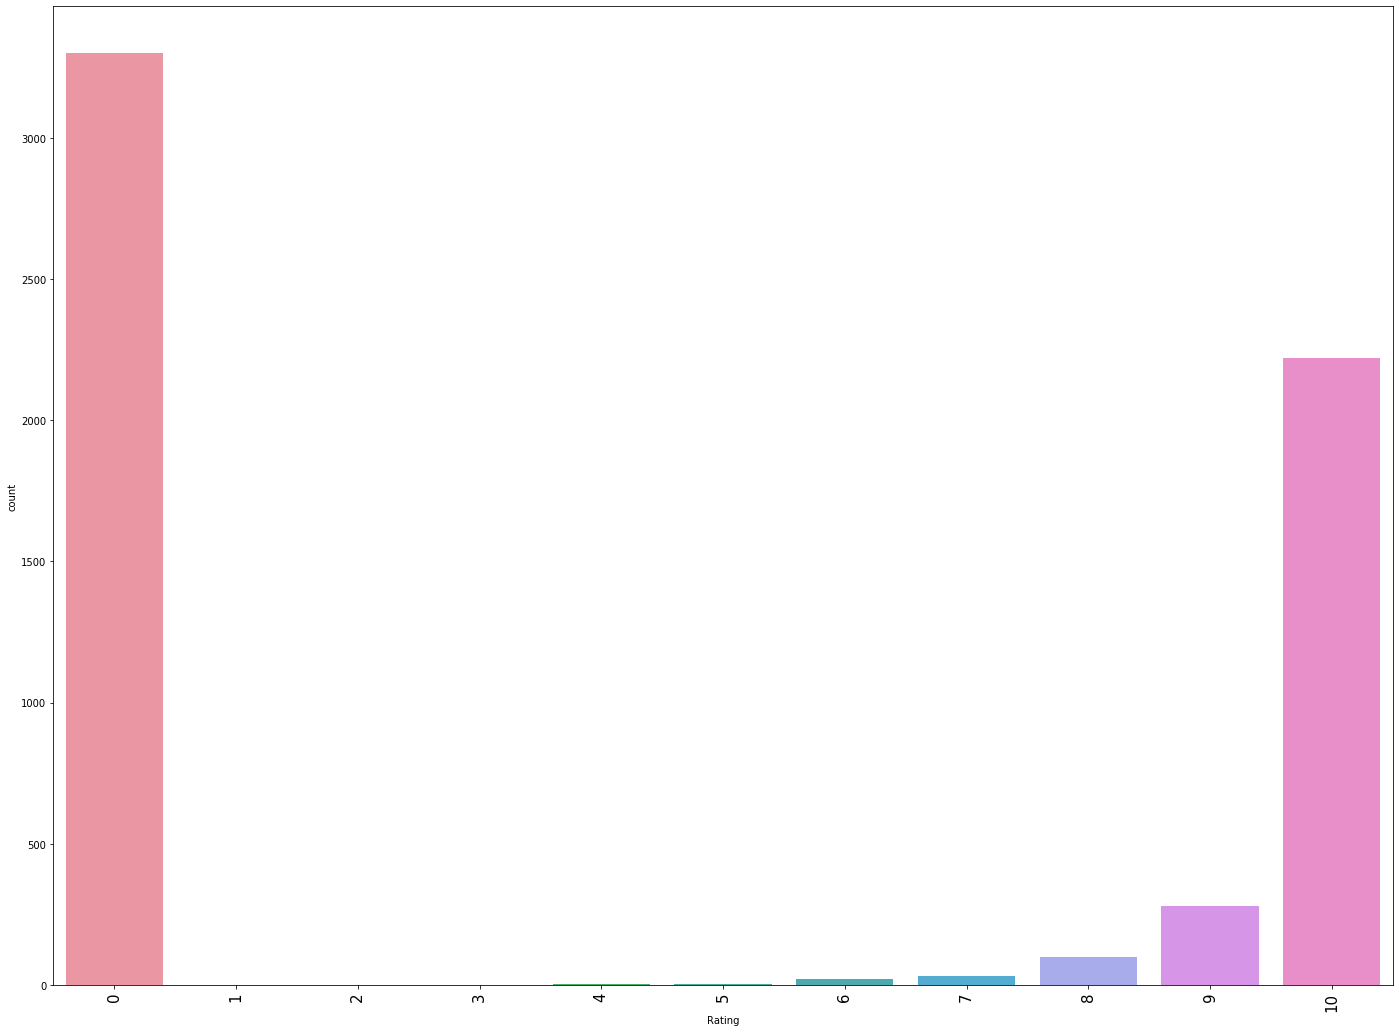

0     3302
10    2222
9      280
8       98
7       32
6       19
4        4
5        3
1        1
3        0
2        0
Name: Rating, dtype: int64


In [27]:
# count plot for Rating column
plt.figure(figsize=(24,18))
sns.countplot(x='Rating',data=train)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()
print(train['Rating'].value_counts())

Most of the doctors rating is 100%, here Bin 0 represents for missing values

## Bivariate Analysis

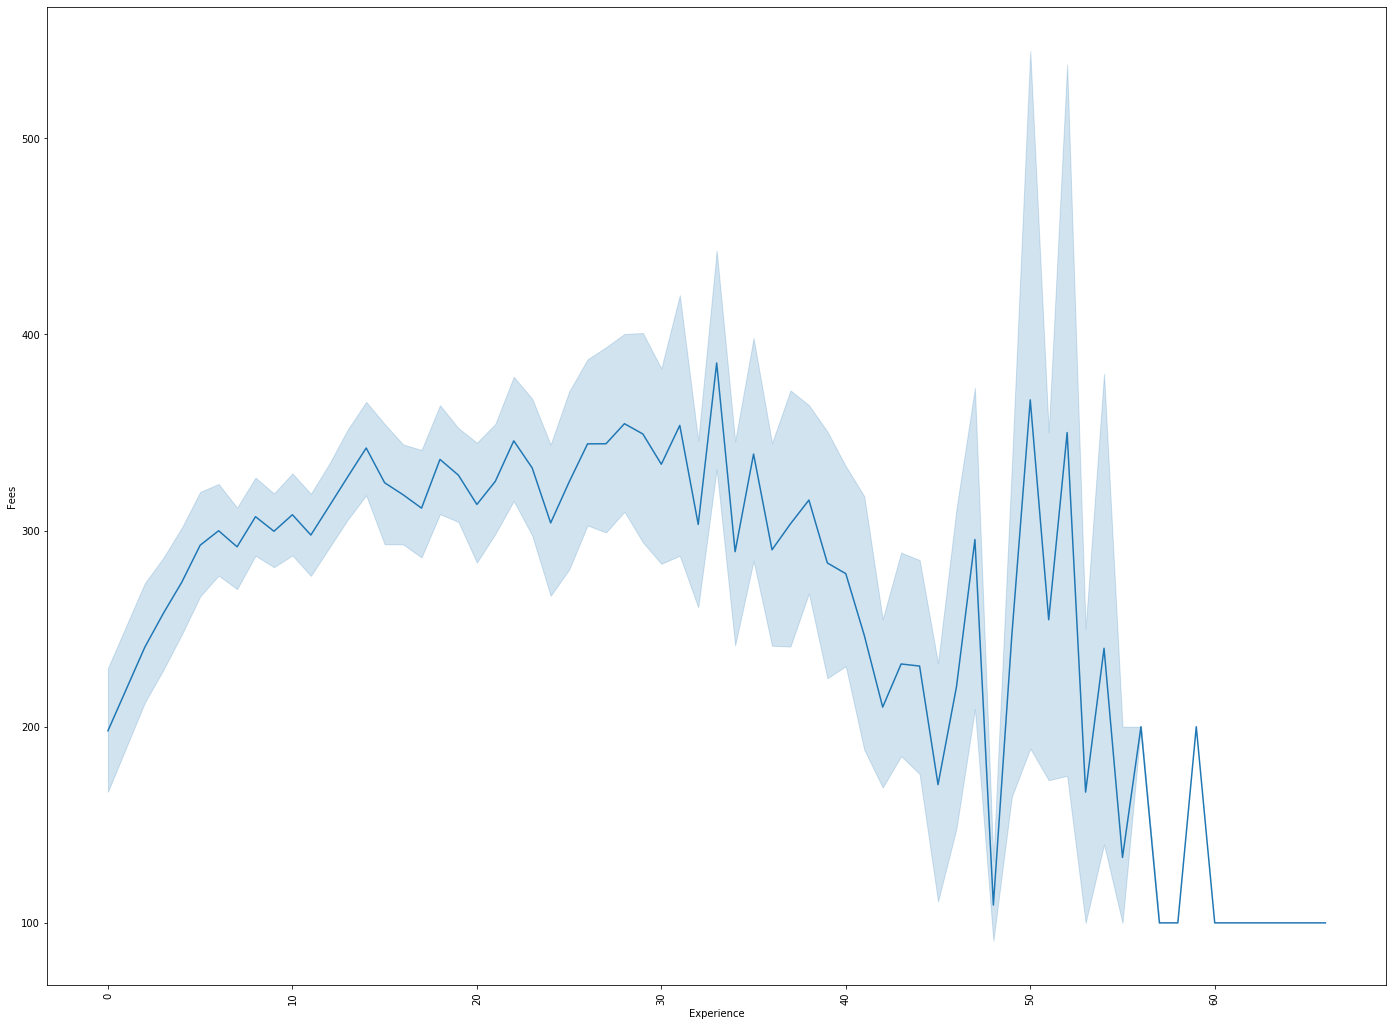

In [28]:
plt.figure(figsize=(24,18))
sns.lineplot(x='Experience',y='Fees',data=train,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

Fees is increasing approximately upto 32-33 years of experience but later it is decreasing and then increasing

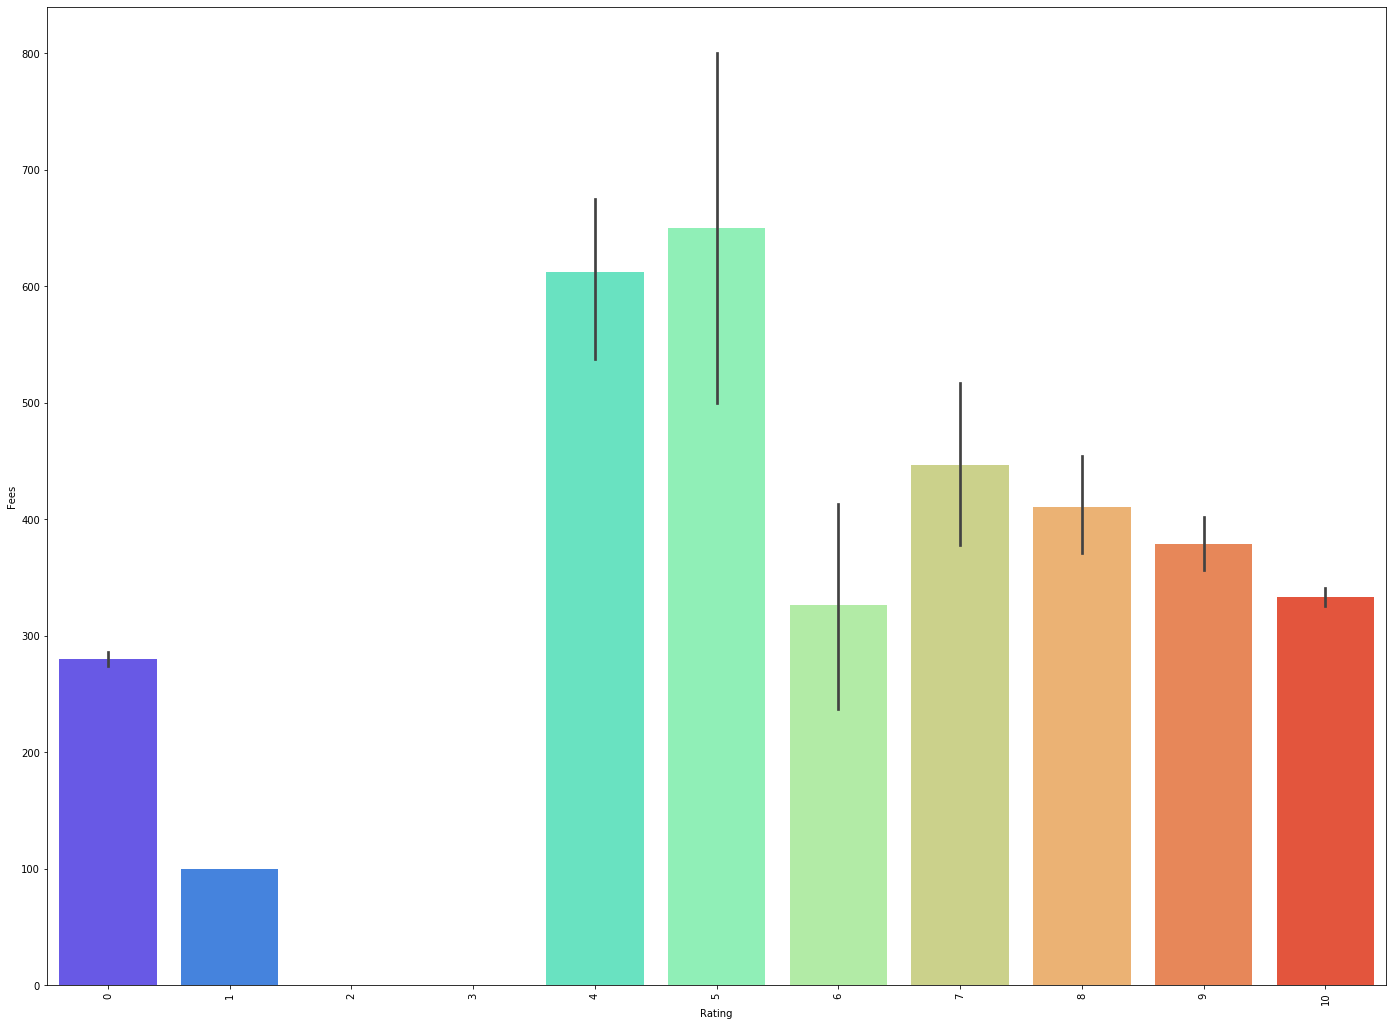

In [29]:
plt.figure(figsize=(24,18))
sns.barplot(x='Rating',y='Fees',data=train,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

Those are having 50% of rating that are  charging more fees
Those ratings are between 70-100 % they are charging fees ranges from 300-450 

In [30]:
train.head()

,Experience,Rating,Place,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Missing,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,Kakkanad,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,Whitefield,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,Mathikere - BEL,NaN,300,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,Bannerghatta Road,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,Keelkattalai,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
train.drop(columns=["Miscellaneous_Info"],axis=1,inplace=True)

In [32]:
train.head()

,Experience,Rating,Place,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Missing,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,Kakkanad,100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,Whitefield,350,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,Mathikere - BEL,300,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,Bannerghatta Road,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,Keelkattalai,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
train['Place']=lb.fit_transform(train['Place'])

In [34]:
train.shape

(5961, 29)

In [35]:
train.skew()

Experience                               0.991089
Rating                                   0.240670
Place                                    0.111877
Fees                                     0.751870
MBBS                                     0.118000
BDS                                      1.293695
BAMS                                     2.229777
BHMS                                     2.261706
MD - Dermatology                         2.639954
MS - ENT                                 3.403459
Venereology & Leprosy                    4.171950
MD - General Medicine                    4.239699
Diploma in Otorhinolaryngology (DLO)     4.581912
MD - Homeopathy                          5.475409
City_ Bangalore                          1.416677
City_ Chennai                            2.035059
City_ Coimbatore                         4.816241
City_ Delhi                              1.509849
City_ Ernakulam                          6.000437
City_ Hyderabad                          1.860027


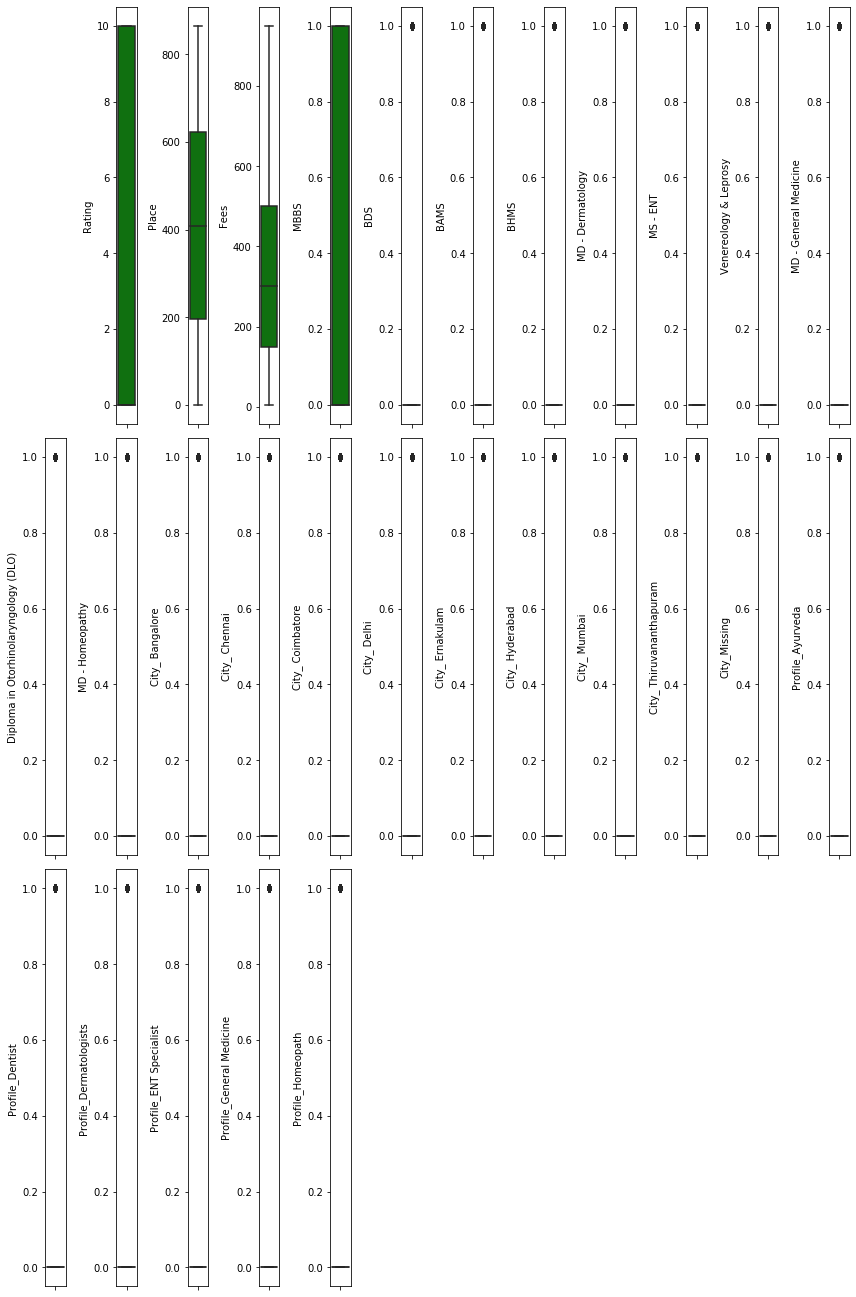

In [36]:
# plotting outliers
collist=train.columns.values
ncol=12
nrows=10
collist
plt.figure(figsize=(ncol, 5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(train[collist[i]],color='green',orient='v')
    plt.tight_layout()
    
           

In [37]:
#removing skewness
for column in train.columns:
    if train.skew().loc[column]>0.55:
        train[column]=np.log1p(train[column])

In [38]:
train.skew()

Experience                              -0.895198
Rating                                   0.240670
Place                                    0.111877
Fees                                    -0.298173
MBBS                                     0.118000
BDS                                      1.293695
BAMS                                     2.229777
BHMS                                     2.261706
MD - Dermatology                         2.639954
MS - ENT                                 3.403459
Venereology & Leprosy                    4.171950
MD - General Medicine                    4.239699
Diploma in Otorhinolaryngology (DLO)     4.581912
MD - Homeopathy                          5.475409
City_ Bangalore                          1.416677
City_ Chennai                            2.035059
City_ Coimbatore                         4.816241
City_ Delhi                              1.509849
City_ Ernakulam                          6.000437
City_ Hyderabad                          1.860027


In [39]:
#lets drop city missing column as itb is having high skewness value
train.drop('City_Missing',axis=1,inplace=True)

# Feature Selection

In [40]:
x=train.drop('Fees',axis=1)
y=train['Fees']

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=44)

In [48]:
#feature scaling
#scaling the data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [49]:
#checking scoring for LinearRegression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("mean squared error:",mean_squared_error(y_test,pred))
print("RSME:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.22343641757104327
mean squared error: 0.35828516709479746
RSME: 0.5985692667476317


In [51]:
model=[LinearRegression(),Ridge(alpha=10),Lasso(alpha=1),ElasticNet(alpha=0.0001),KNeighborsRegressor(), DecisionTreeRegressor()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('r2 score:',r2_score(y_test,predm))
    print('mean absolute error:',mean_absolute_error(y_test,predm))
    print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')

r2 score: 0.22343641757104327
mean absolute error: 0.48566180443289025
root mean squared error: 0.5985692667476317


r2 score: 0.22379413475984644
mean absolute error: 0.4860995269466211
root mean squared error: 0.598431388031784


r2 score: -0.00016821234155228737
mean absolute error: 0.5727258746774858
root mean squared error: 0.6793012725399228


r2 score: 0.2236937536128485
mean absolute error: 0.48556145034082876
root mean squared error: 0.5984700822041681


r2 score: 0.14513743865868023
mean absolute error: 0.49366458197589136
root mean squared error: 0.6280208367403002


r2 score: -0.44745660366065865
mean absolute error: 0.5888785875192657
root mean squared error: 0.8172006066672891




## Max r2 score calculation

In [52]:
def max_r2_score(reg,x,y):
    max_r_score=0
    for r_state in range(42,100):
        
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=r_state)
        reg.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2 score correspond to random state:',r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        print()
        print("max r_score correspond to",final_r_state,'is',max_r_score)
    return final_r_state

In [53]:
lr=LinearRegression()
r_state=max_r2_score(lr,x,y)

r2 score correspond to random state: 42 is 0.18358386363979962

max r_score correspond to 42 is 0.18358386363979962
r2 score correspond to random state: 43 is 0.17621043166008088

max r_score correspond to 42 is 0.18358386363979962
r2 score correspond to random state: 44 is 0.2245673862797931

max r_score correspond to 44 is 0.2245673862797931
r2 score correspond to random state: 45 is 0.17622866417821448

max r_score correspond to 44 is 0.2245673862797931
r2 score correspond to random state: 46 is 0.16955076390053847

max r_score correspond to 44 is 0.2245673862797931
r2 score correspond to random state: 47 is 0.17188131047186628

max r_score correspond to 44 is 0.2245673862797931
r2 score correspond to random state: 48 is 0.18775702520472692

max r_score correspond to 44 is 0.2245673862797931
r2 score correspond to random state: 49 is 0.18899653828771257

max r_score correspond to 44 is 0.2245673862797931
r2 score correspond to random state: 50 is 0.16710593556120468

max r_score cor

## Ensemble Techniques

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print(r2_score(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.19171269704199112
mean absolute error: 0.4799933572758909
root mean squared error: 0.6106730899949203


In [57]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(r2_score(y_test,predad))
print('mean absolute error:',mean_absolute_error(y_test,predad))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predad)))

0.054676201794639945
mean absolute error: 0.5602824835178227
root mean squared error: 0.6604138917100181


Among all models Linear Regression is working good

## Hyperparameter Tunning

In [59]:
#Hyper parameter tunning
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)
from sklearn.model_selection import RandomizedSearchCV
# randomized search cv
#no. of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#no. of feature consider at every split
max_features=['auto','sqrt']
# max. no. of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#max_depth.append(None)
#Minimum no. of samples required to split a node
min_sample_split=[2,5,10,15,100]
#minimum no. of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [60]:
# create the random grid
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_sample_split,
             'min_samples_leaf':min_samples_leaf
              }

In [61]:
rf_random=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,scoring='r2',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [62]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  14.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [63]:
rf_random.best_score_

0.20735355358871105

In [64]:
#Lets save linear regression model 
from sklearn.externals import joblib
joblib.dump(lr,'doctors fees.pkl')

['doctors fees.pkl']